# HEP Plotter Gallery (1D) with arrays!
Below are a collection of simple examples that demonstrate the capabilities of hepPlotter.  
This package is only meant to improve style and reduce time needed to make publication quality figures for HEP.  
Where possible, the API for matplotlib is used directly (the default options are modified to better suit HEP plots).  However, the user should still retain enough control to modify plots as needed.

### HEP Plotter Backend
In the hepPlotter framework, ROOT data can be accessed using either c++ `ROOT` or `uproot`.  
For this gallery of examples, the backend `uproot` is chosen because it shares the same setup that we need here (just using numpy to make histograms).

First, ensure the environment has the proper path for this setup.   Nominally this would be used inside a CMSSW environment, so the import statements will vary.

In [1]:
import os
import sys

In [2]:
cwd = os.getcwd()
hpd = cwd.rstrip("examples")+"python/"
if hpd not in sys.path:
    sys.path.insert(0,hpd)
    print("Added {0} to path!".format(hpd))
else:
    print("Already exists in path!")

Added /Users/demarley/Desktop/Home/hepex/hepPlotter/python/ to path!


## One dimensional Histograms from Arrays
In addition to using ROOT histograms, as shown in other notebooks, you can use raw data (arrays) to make plots.  
The same formatting options are available, so here we just demonstrate one simple example.

In [3]:
import numpy as np
from histogram1D import Histogram1D
%matplotlib inline

/Users/demarley/anaconda2/lib/python2.7/site-packages/matplotlib/style/core.py:51: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


In [4]:
# Generate some pseudo-data (matches the histograms stored in example root file)
bins  = range(21)
n     = 10000
mu    = 5
sigma = 1

gauss   = np.random.normal(mu,sigma, n)
poisson = np.random.poisson(mu, n)

print " Gauss:   {0}".format(gauss)
print " Poisson: {0}".format(poisson)

 Gauss:   [4.62873152 5.16162849 4.34542637 ... 4.46946109 5.88278509 4.80670829]
 Poisson: [4 3 6 ... 5 9 7]


/Users/demarley/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


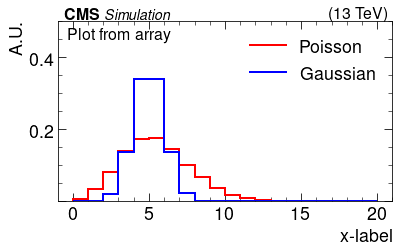

In [5]:
# Setup the plot (define some global settings)
hist = Histogram1D()

hist.backend = 'uproot'  # for arrays, use the `uproot` for the backend instead of ROOT
hist.normed  = True
hist.stacked = False
hist.binning = bins
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example1"
hist.CMSlabel = 'outer'
hist.CMSlabelStatus = "Simulation"

# Add extra text onto the plot
# this is stored as a `PlotText()` object, defined in labels.py
# - kwargs are defined in `Text()` of labels.py
hist.extra_text.Add("Plot from array",coords=[0.03,0.96])

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(poisson,name="poisson",
         draw_type='step',color='red',edgecolor="red",
         label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(gauss,name="gauss",
         draw_type='step',color='blue',edgecolor="blue",
         label="Gaussian")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

### Plots from binned data
In addition to passing raw data into hepPlotter, you can also pass data that has already been binned into a histogram.

In [ ]:
h_gauss,b_gauss = np.histogram(gauss,bins=bins)
h_poiss,b_poiss = np.histogram(poisson,bins=bins)

bins = np.asarray(bins)
bin_centers = 0.5*(bins[:-1]+bins[1:])  # these will be 'dummy' values that mark the center of the bins 
                                        # for filling with 'weights' (the bin contents)

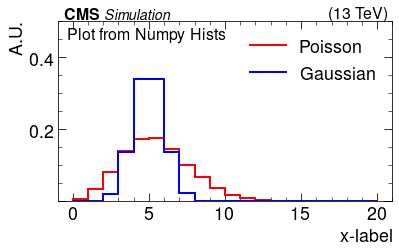

In [7]:
# Setup the plot (define some global settings)
hist = Histogram1D()

hist.backend = 'uproot'   # use the `uproot` backend rather than ROOT
hist.normed  = True
hist.stacked = False
hist.binning = bins
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example1"
hist.CMSlabel = 'outer'
hist.CMSlabelStatus = "Simulation"

# Add extra text onto the plot
# this is stored as a `PlotText()` object, defined in labels.py
# - kwargs are defined in `Text()` of labels.py
hist.extra_text.Add("Plot from Numpy Hists",coords=[0.03,0.96])

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(bin_centers,name="poisson",weights=h_poiss,
         draw_type='step',color='red',edgecolor="red",
         label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(bin_centers,name="gauss",weights=h_gauss,
         draw_type='step',color='blue',edgecolor="blue",
         label="Gaussian")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

### Re-bin histogram
You can even re-bin the histogram in hepPlotter!

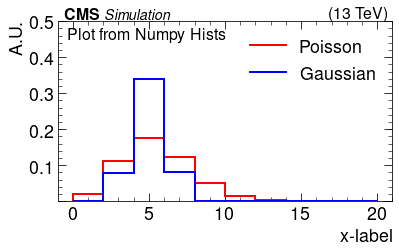

In [8]:
# Setup the plot (define some global settings)
hist = Histogram1D()

hist.backend = 'uproot'   # use the `uproot` backend rather than ROOT for arrays
hist.normed  = True
hist.stacked = False
hist.binning = bins
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example1"
hist.CMSlabel = 'outer'
hist.CMSlabelStatus = "Simulation"

hist.rebin = 2  # merge every 2 bins together into
                # if `hist.rebin` is a number, it needs to be evenly divisible into the current number of bins
                # if `hist.rebin` is an array, the bin edges need to match existing bin edges, e.g.,:
                #   you cannot rebin '[0,1,4,7,10]' into '[0,3,6,10]'
                #   you can rebin '[0,1,4,7,10]' into '[0,4,10]'

# Add extra text onto the plot
# this is stored as a `PlotText()` object, defined in labels.py
# - kwargs are defined in `Text()` of labels.py
hist.extra_text.Add("Plot from Numpy Hists",coords=[0.03,0.96])

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(bin_centers,name="poisson",weights=h_poiss,
         draw_type='step',color='red',edgecolor="red",
         label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(bin_centers,name="gauss",weights=h_gauss,
         draw_type='step',color='blue',edgecolor="blue",
         label="Gaussian")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

And it is possible to `rebin` with an array

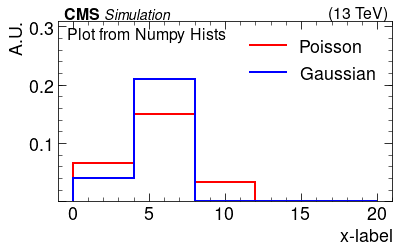

In [10]:
# Setup the plot (define some global settings)
hist = Histogram1D()

hist.backend = 'uproot'   # use the `uproot` backend rather than ROOT for arrays
hist.normed  = True
hist.stacked = False
hist.binning = bins
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example1"
hist.CMSlabel = 'outer'
hist.CMSlabelStatus = "Simulation"

hist.rebin = [0,4,8,12,20]  # if `hist.rebin` is an array, the bin edges need to match existing bin edges, e.g.,:
                            #   you cannot rebin '[0,1,4,7,10]' into '[0,3,6,10]'
                            #   you can rebin '[0,1,4,7,10]' into '[0,4,10]'

# Add extra text onto the plot
# this is stored as a `PlotText()` object, defined in labels.py
# - kwargs are defined in `Text()` of labels.py
hist.extra_text.Add("Plot from Numpy Hists",coords=[0.03,0.96])

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(bin_centers,name="poisson",weights=h_poiss,
         draw_type='step',color='red',edgecolor="red",
         label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(bin_centers,name="gauss",weights=h_gauss,
         draw_type='step',color='blue',edgecolor="blue",
         label="Gaussian")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it